# Introdução à Otimização de Hiperparâmetros

Leão Pereira Neto

R.A: 22200115


In [7]:
from sklearn.linear_model import LogisticRegression

# Criando um modelo de Regressão Logística
modelo = LogisticRegression()

In [8]:
# Carregando dataset do sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

#Carregando o dataset de dígitos
data = pd.read_csv('exams.csv')


In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,standard,none,78,67,69
1,female,group E,high school,standard,completed,81,77,90
2,female,group D,some college,free/reduced,completed,32,52,52
3,male,group D,high school,standard,none,44,37,37
4,female,group B,bachelor's degree,free/reduced,completed,60,69,69


In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.29500,69.839000,68.606000
std,14.77492,14.491276,15.130092
min,19.00000,25.000000,20.000000
25%,56.00000,60.000000,59.000000
50%,66.00000,70.000000,69.000000
75%,77.00000,80.000000,80.000000
max,100.00000,100.000000,100.000000


In [14]:
data.rename(columns={'writing score':'writing.score'}, inplace=True)

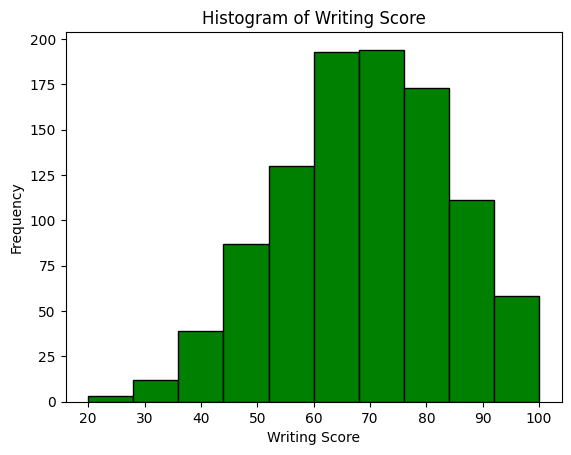

In [19]:
import matplotlib.pyplot as plt
plt.hist(data['writing.score'], bins=10, edgecolor='black', color='green')  # Especifique o número de bins desejado
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Histogram of Writing Score')
plt.show()

In [ ]:
X = data

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
np.unique(y)

In [ ]:
# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma rede neural simples
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilando e treinando o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [ ]:
# Mostrando alguns parâmetros (pesos) da primeira camada
weights_first_layer = model.layers[0].get_weights()[0]
print("Pesos da primeira camada:\n", weights_first_layer)

In [ ]:
weights_first_layer.shape

In [ ]:
# Definindo hiperparâmetros para uma rede neural
learning_rate = 0.001
batch_size = 32
epochs = 50
number_of_neurons_layer1 = 128
number_of_neurons_layer2 = 64
number_of_neurons_layer3 = 128
activation_function = 'relu'

# Criando um modelo usando os hiperparâmetros
model = Sequential()
model.add(Dense(number_of_neurons_layer1, input_dim=X_train.shape[1], activation=activation_function))
model.add(Dense(number_of_neurons_layer2, activation=activation_function))
model.add(Dense(number_of_neurons_layer3, activation=activation_function))
model.add(Dense(10, activation='softmax'))

# Treinando o modelo usando os hiperparâmetros
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metricas_classificacao(y_real, y_pred):
    # Calcular métricas
    metrics = {
        "Acurácia": accuracy_score(y_real, y_pred),
        "Precisão (macro)": precision_score(y_real, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_real, y_pred, average='macro'),
        "F1-Score (macro)": f1_score(y_real, y_pred, average='macro')
    }
    
    # Printar métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Calcular a Matriz de Confusão
    confusion_mat = confusion_matrix(y_real, y_pred)

    # Printar Matriz de Confusão
    print("Matriz de Confusão:")
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    return metrics


In [ ]:
# Importando as bibliotecas necessárias para construir o modelo da rede neural
from keras.models import Sequential
from keras.layers import Dense

# Função que cria e retorna um modelo de rede neural
def create_model(neurons1=128, neurons2=64, activation_function='relu'):
    
    # Inicializando o modelo sequencial
    model = Sequential()
    
    # Adicionando a primeira camada oculta com o número de neurônios especificado (neurons1)
    # 'input_dim' especifica o número de características de entrada
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation=activation_function))
    
    # Adicionando a segunda camada oculta com o número de neurônios especificado (neurons2)
    model.add(Dense(neurons2, activation=activation_function))
    
    # Adicionando a terceira camada oculta com 128 neurônios
    model.add(Dense(128, activation=activation_function))
    
    # Adicionando a camada de saída com 10 neurônios (para um problema de classificação de 10 classes)
    model.add(Dense(10, activation='softmax'))
    
    # Compilando o modelo - especificando o otimizador, a função de perda e a métrica de avaliação
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Importando o KerasClassifier que permite usar modelos Keras com scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
# Importando GridSearchCV para otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Criando uma instância do KerasClassifier com a função de criação do modelo e especificando 20 épocas
model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Definindo a grade de hiperparâmetros que queremos testar
param_grid = {
    'neurons1': [64, 128, 256],                # diferentes quantidades de neurônios para a primeira camada
    'neurons2': [64, 128, 256],                # diferentes quantidades de neurônios para a segunda camada
    'activation_function': ['relu', 'tanh']  # diferentes funções de ativação
}

# Configurando o GridSearchCV com o modelo, a grade de parâmetros, e outras opções
grid = GridSearchCV(estimator=model_for_grid, param_grid=param_grid, n_jobs=-1, cv=3)

# Iniciando a busca pelos melhores hiperparâmetros usando o conjunto de treinamento
grid_result = grid.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros: {grid_result.best_params_}")

In [ ]:
3 * 3 * 2 * 20

In [ ]:
best_model = create_model(neurons1=128, neurons2=128, activation_function='relu')
best_model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(best_model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

In [ ]:
model = create_model(neurons1=64, neurons2=64, activation_function='relu')
model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o espaço de hiperparâmetros
param_dist = {
    'neurons1': [64, 128, 256, 512],
    'neurons2': [64, 128, 256, 512],
    'activation_function': ['relu', 'tanh', 'softmax']
}

model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Configurando o RandomizedSearchCV com 10 iterações
random_search = RandomizedSearchCV(estimator=model_for_grid, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3)

# Iniciando a busca pelos melhores hiperparâmetros usando o conjunto de treinamento
random_result = random_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result.best_params_}")


In [ ]:
model = create_model(neurons1=128, neurons2=256, activation_function='relu')
model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

In [ ]:
!pip install bayesian-optimization

In [ ]:
# Importando a biblioteca necessária
from bayes_opt import BayesianOptimization

# Definindo a função objetivo que queremos otimizar.
# Esta função treina um modelo com hiperparâmetros fornecidos e retorna a acurácia de validação.
def objective_function(neurons1, neurons2, activation_index):
    
    # Mapeia os índices para suas respectivas funções de ativação.
    activation_functions = ['relu', 'tanh']
    activation_function = activation_functions[int(activation_index)]
    
    # Cria e compila o modelo usando os hiperparâmetros fornecidos.
    model = create_model(int(neurons1), int(neurons2), activation_function)
    
    # Treina o modelo e obtém o histórico de treinamento.
    history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_split=0.2)
    
    # Obtém a acurácia de validação da última época.
    val_accuracy = history.history['val_accuracy'][-1]
    
    return val_accuracy

# Definindo os limites dos hiperparâmetros para a otimização bayesiana.
# Os hiperparâmetros contínuos têm intervalos definidos (por exemplo, neurons1 entre 64 e 256).
# Para hiperparâmetros categóricos, usamos índices (por exemplo, activation_index entre 0 e 1).
pbounds = {
    'neurons1': (64, 256),
    'neurons2': (64, 256),
    'activation_index': (0, 1)
}

# Inicializa o otimizador bayesiano com a função objetivo e os limites dos hiperparâmetros.
optimizer = BayesianOptimization(
    f=objective_function,     # Função objetivo definida anteriormente.
    pbounds=pbounds,          # Limites dos hiperparâmetros.
    random_state=1            # Semente para reprodutibilidade.
)

# Executa a otimização bayesiana.
# 'init_points' define quantos pontos iniciais aleatórios serão testados antes da otimização começar.
# 'n_iter' define quantas iterações de otimização serão executadas.
optimizer.maximize(init_points=5, n_iter=10)

# Exibe os melhores hiperparâmetros encontrados.
print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")